# Milestone report

### Preliminaries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.stats.api as sms
import math

### Read original files

In [2]:
# Cross walk of County, Commuting Zone and State
cw = pd.read_csv('Health-Wealth/cty_cz_st_crosswalk.csv', index_col=None)

In [3]:
# National life expectancy estimates (pooling 2001-14) for men and women, by income percentile 
ltb1 = pd.read_csv('Health-Wealth/health_ineq_online_table_1.csv', index_col=None)
# National by-year life expectancy estimates for men and women, by income percentile
ltb2 = pd.read_csv('Health-Wealth/health_ineq_online_table_2.csv', index_col=None)
# State-level life expectancy estimates for men and women, by income quartile
ltb3 = pd.read_csv('Health-Wealth/health_ineq_online_table_3.csv', index_col=None)
# State-level estimates of trends in life expectancy for men and women, by income quartile
ltb4 = pd.read_csv('Health-Wealth/health_ineq_online_table_4.csv', index_col=None)
# State-level by-year life expectancy estimates for men and women, by income quartile 
ltb5 = pd.read_csv('Health-Wealth/health_ineq_online_table_5.csv', index_col=None)
# CZ-level life expectancy estimates for men and women, by income quartile
ltb6 = pd.read_csv('Health-Wealth/health_ineq_online_table_6.csv', index_col=None)
# CZ-level life expectancy estimates for men and women, by income ventile
ltb7 = pd.read_csv('Health-Wealth/health_ineq_online_table_7.csv', index_col=None)
# CZ-level estimates of trends in life expectancy for men and women, by income quartile
ltb8 = pd.read_csv('Health-Wealth/health_ineq_online_table_8.csv', index_col=None)
# CZ-level by-year life expectancy estimates for men and women, by income quartile
ltb9 = pd.read_csv('Health-Wealth/health_ineq_online_table_9.csv', index_col=None)
# CZ-level characteristics described in eTable 9 
ltb10 = pd.read_csv('Health-Wealth/health_ineq_online_table_10.csv', index_col=None)
# County-level life expectancy estimates for men and women, by income quartile 
ltb11 = pd.read_csv('Health-Wealth/health_ineq_online_table_11.csv', index_col=None)
# County-level characteristics described in eTable 9 
ltb12 = pd.read_csv('Health-Wealth/health_ineq_online_table_12.csv', index_col=None, encoding='latin-1')
# International estimates of mean life expectancy at age 40, by country for men and women
ltb13 = pd.read_csv('Health-Wealth/health_ineq_online_table_13.csv', index_col=None)
# Comparison of population and death counts in tax data and NCHS data 
ltb14 = pd.read_csv('Health-Wealth/health_ineq_online_table_14.csv', index_col=None)

### Data Wrangling

For each table, remove the Unadjusted and Standard Error columns.

In [4]:
tb1 = ltb1.loc[:, 'gnd':'le_raceadj']
tb2 = ltb2.loc[:, 'gnd':'le_raceadj']

In [5]:
tb3 = ltb3[['st', 'statename', 'stateabbrv', 'le_raceadj_q1_F', 'le_raceadj_q2_F', 'le_raceadj_q3_F', 'le_raceadj_q4_F', 'le_raceadj_q1_M', 'le_raceadj_q2_M', 'le_raceadj_q3_M', 'le_raceadj_q4_M', 'count_q1_F', 'count_q2_F', 'count_q3_F', 'count_q4_F', 'count_q1_M', 'count_q2_M', 'count_q3_M', 'count_q4_M']]

In [6]:
tb4 = ltb4[['st', 'statename', 'stateabbrv', 'le_raceadj_slope_q1_F', 'le_raceadj_slope_q2_F', 'le_raceadj_slope_q3_F', 'le_raceadj_slope_q4_F', 'le_raceadj_slope_q1_M', 'le_raceadj_slope_q2_M', 'le_raceadj_slope_q3_M', 'le_raceadj_slope_q4_M', 'count_q1_F', 'count_q2_F', 'count_q3_F', 'count_q4_F', 'count_q1_M', 'count_q2_M', 'count_q3_M', 'count_q4_M']]

In [7]:
tb5 = ltb5[['st', 'statename', 'stateabbrv', 'year', 'le_raceadj_q1_F', 'le_raceadj_q2_F', 'le_raceadj_q3_F', 'le_raceadj_q4_F', 'le_raceadj_q1_M', 'le_raceadj_q2_M', 'le_raceadj_q3_M', 'le_raceadj_q4_M', 'count_q1_F', 'count_q2_F', 'count_q3_F', 'count_q4_F', 'count_q1_M', 'count_q2_M', 'count_q3_M', 'count_q4_M']]

In [8]:
tb6 = ltb6[['cz', 'czname', 'pop2000', 'fips', 'statename', 'stateabbrv', 'le_raceadj_q1_F', 'le_raceadj_q2_F', 'le_raceadj_q3_F', 'le_raceadj_q4_F', 'le_raceadj_q1_M', 'le_raceadj_q2_M', 'le_raceadj_q3_M', 'le_raceadj_q4_M', 'count_q1_F', 'count_q2_F', 'count_q3_F', 'count_q4_F', 'count_q1_M', 'count_q2_M', 'count_q3_M', 'count_q4_M']]

In [9]:
tb7_1 = ltb7.loc[:, 'cz':'le_raceadj_v20_F']
tb7_2 = ltb7.loc[:, 'le_raceadj_v1_M':'le_raceadj_v20_M']
tb7_3 = ltb7.loc[:, 'count_v1_F':'count_v20_M']
tb7 = pd.concat([tb7_1, tb7_2, tb7_3], axis = 1)

In [10]:
tb8 = ltb8[['cz', 'czname', 'pop2000', 'fips', 'statename', 'stateabbrv', 'le_raceadj_slope_q1_F', 'le_raceadj_slope_q2_F', 'le_raceadj_slope_q3_F', 'le_raceadj_slope_q4_F', 'le_raceadj_slope_q1_M', 'le_raceadj_slope_q2_M', 'le_raceadj_slope_q3_M', 'le_raceadj_slope_q4_M', 'count_q1_F', 'count_q2_F', 'count_q3_F', 'count_q4_F', 'count_q1_M', 'count_q2_M', 'count_q3_M', 'count_q4_M']]

In [11]:
tb9 = ltb9[['cz', 'czname', 'pop2000', 'stateabbrv', 'year', 'le_raceadj_q1_F', 'le_raceadj_q2_F', 'le_raceadj_q3_F', 'le_raceadj_q4_F', 'le_raceadj_q1_M', 'le_raceadj_q1_M', 'le_raceadj_q2_M', 'le_raceadj_q3_M', 'count_q4_F', 'count_q1_M', 'count_q2_M', 'count_q3_M', 'count_q4_M']]

In [12]:
tb11_1 = ltb11.loc[:, 'cty':'stateabbrv']
tb11_2 = ltb11[['le_raceadj_q1_F', 'le_raceadj_q2_F', 'le_raceadj_q3_F', 'le_raceadj_q4_F', 'le_raceadj_q1_M', 'le_raceadj_q2_M', 'le_raceadj_q3_M', 'le_raceadj_q4_M', 'count_q1_F', 'count_q2_F', 'count_q2_F', 'count_q4_F', 'count_q1_M', 'count_q2_M', 'count_q3_M', 'count_q4_M']]
tb11 = pd.concat([tb11_1, tb11_2], axis = 1)

In [13]:
tb13 = ltb13
tb14 = ltb14

In [14]:
# Save data sets to files
tb1.to_csv('table_1.csv', index=False)
tb2.to_csv('table_2.csv', index=False)
tb3.to_csv('table_3.csv', index=False)
tb4.to_csv('table_4.csv', index=False)
tb5.to_csv('table_5.csv', index=False)
tb6.to_csv('table_6.csv', index=False)
tb7.to_csv('table_7.csv', index=False)
tb8.to_csv('table_8.csv', index=False)
tb9.to_csv('table_9.csv', index=False)
tb11.to_csv('table_11.csv', index=False)
tb13.to_csv('table_13.csv', index=False)
tb14.to_csv('table_14.csv', index=False)

#### Fill missing values in table 10
* A column is removed if there are more than 10% missing value.   
* A commuting zone is removed if all the values of a column are missing.  
* Fill missing values with the mean value of that that commuting zone.

In [15]:
# Remove the columns whose empty values are more than 20% in table 10
tb10 = ltb10
l = len(tb10)
names = tb10.columns.values[6:] 
for name in names:
    n = tb10[name].isnull().values.sum()
    if n/l > 0.1: 
        tb10 = tb10.drop([name], axis=1)

In [16]:
tb10.head()

,cz,czname,pop2000,fips,statename,stateabbrv,puninsured2010,reimb_penroll_adj10,mort_30day_hosp_z,adjmortmeas_amiall30day,...,ccd_exp_tot,ccd_pup_tch_ratio,score_r,cs_educ_ba,e_rank_b,cs_fam_wkidsinglemom,crime_total,subcty_exp_pc,taxrate,tax_st_diff_top20
0,100,Johnson City,576081.0,47,Tennessee,TN,15.99971,10121.9180,1.020608,0.165202,...,5.184547,NaN,2.728379,15.869880,38.38750,0.189803,0.005402,1886.148,0.020392,0.0
1,200,Morristown,227816.0,47,Tennessee,TN,19.50662,10228.2860,0.896963,0.162280,...,4.505886,NaN,-3.400274,11.720440,37.77675,0.185106,0.007115,2004.337,0.023447,0.0
2,301,Middlesborough,66708.0,47,Tennessee,TN,17.74554,12756.4190,0.712357,0.185303,...,5.614119,15.084937,-9.315062,9.077307,39.04925,0.211003,0.003898,1189.820,0.015380,0.0
3,302,Knoxville,727600.0,47,Tennessee,TN,14.88756,9913.4986,0.283885,0.150970,...,4.899846,NaN,-6.031831,22.526610,37.84125,0.205602,0.005388,2356.851,0.018870,0.0
4,401,Winston-Salem,493180.0,37,North Carolina,NC,19.02583,9635.7908,0.506144,0.167063,...,5.462676,15.385281,-2.297035,22.389480,36.96925,0.220471,0.010577,1891.450,0.017905,1.0


In [17]:
names = tb10.columns.values[6:]
names

array(['puninsured2010', 'reimb_penroll_adj10', 'mort_30day_hosp_z',
       'adjmortmeas_amiall30day', 'adjmortmeas_chfall30day',
       'adjmortmeas_pnall30day', 'med_prev_qual_z', 'primcarevis_10',
       'diab_hemotest_10', 'diab_eyeexam_10', 'diab_lipids_10',
       'mammogram_10', 'amb_disch_per1000_10', 'cs00_seg_inc',
       'cs00_seg_inc_pov25', 'cs00_seg_inc_aff75', 'cs_race_theil_2000',
       'gini99', 'poor_share', 'inc_share_1perc', 'frac_middleclass',
       'scap_ski90pcm', 'rel_tot', 'cs_frac_black', 'cs_frac_hisp',
       'unemp_rate', 'pop_d_2000_1980', 'lf_d_2000_1980', 'cs_labforce',
       'cs_elf_ind_man', 'cs_born_foreign', 'mig_inflow', 'mig_outflow',
       'pop_density', 'frac_traveltime_lt15', 'hhinc00',
       'median_house_value', 'ccd_exp_tot', 'ccd_pup_tch_ratio', 'score_r',
       'cs_educ_ba', 'e_rank_b', 'cs_fam_wkidsinglemom', 'crime_total',
       'subcty_exp_pc', 'taxrate', 'tax_st_diff_top20'], dtype=object)

In [18]:
czs = tb10['czname'].unique()
len(czs)

686

In [19]:
# Remove commuting zones with all the values in a column are missing in table 10
# Fill missing values with the mean value of that commuting zone.
for name in names:
    g = tb10.groupby(['czname'])
    m = g[name].mean()
    czs = tb10['czname'].unique()
    for cz in czs:
        if m.isnull()[cz]:
            tb10 = tb10[tb10.czname != cz]
        else:
            t = tb10[tb10.czname == cz]
            t = t[name].fillna(m[cz])
            tb10.loc[tb10.czname == cz, name] = t
tb10.to_csv('table_10.csv', index=False)

/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [20]:
len(tb10)

643

#### Fill missing values in table 12
* A column is removed if there are more than 10% missing value.   
* A county is removed if all the values of a column are missing.  
* Fill missing values with the mean value of that that county.

In [21]:
# Remove the columns whose empty values are more than 10% in table 12
tb12 = ltb12
l = len(tb12)
names = tb12.columns.values[9:] 
for name in names:
    n = tb12[name].isnull().values.sum()
    if n/l > 0.1: 
        tb12 = tb12.drop([name], axis=1)

In [22]:
tb12.head()

,cty,county_name,cty_pop2000,cz,cz_name,cz_pop2000,statename,state_id,stateabbrv,intersects_msa,...,ccd_exp_tot,ccd_pup_tch_ratio,score_r,cs_educ_ba,e_rank_b,cs_fam_wkidsinglemom,crime_total,subcty_exp_pc,taxrate,tax_st_diff_top20
0,1001,Autauga,43671,11101,Montgomery,367927.0,Alabama,1,AL,1,...,4.460057,19.715980,-7.308133,18.0,41.87288,0.191595,0.009353,1059.6690,0.011183,0.0
1,1003,Baldwin,140415,11001,Mobile,599405.0,Alabama,1,AL,1,...,4.596590,16.850983,-13.628750,23.1,44.49239,0.186779,0.007371,2209.9100,0.011756,0.0
2,1005,Barbour,29038,10301,Eufaula,61458.0,Alabama,1,AL,0,...,4.734407,16.656711,-15.955110,10.9,37.71876,0.337853,0.007749,1570.2480,0.012059,0.0
3,1007,Bibb,20826,10801,Tuscaloosa,261112.0,Alabama,1,AL,1,...,4.154157,18.958192,-14.839100,7.1,42.24516,0.197729,0.004514,1338.4410,0.008007,0.0
4,1009,Blount,51024,10700,Birmingham,1038182.0,Alabama,1,AL,1,...,3.998976,19.323810,-10.218140,9.6,49.04332,0.121988,0.002019,987.4388,0.007012,0.0


In [23]:
names = tb12.columns.values[9:]
names

array(['intersects_msa', 'puninsured2010', 'reimb_penroll_adj10',
       'mort_30day_hosp_z', 'adjmortmeas_amiall30day',
       'adjmortmeas_chfall30day', 'adjmortmeas_pnall30day',
       'med_prev_qual_z', 'primcarevis_10', 'diab_hemotest_10',
       'diab_eyeexam_10', 'diab_lipids_10', 'mammogram_10',
       'amb_disch_per1000_10', 'cs00_seg_inc', 'cs00_seg_inc_pov25',
       'cs00_seg_inc_aff75', 'cs_race_theil_2000', 'gini99', 'poor_share',
       'inc_share_1perc', 'frac_middleclass', 'scap_ski90pcm', 'rel_tot',
       'cs_frac_black', 'cs_frac_hisp', 'unemp_rate', 'pop_d_2000_1980',
       'lf_d_2000_1980', 'cs_labforce', 'cs_elf_ind_man',
       'cs_born_foreign', 'mig_inflow', 'mig_outflow', 'pop_density',
       'frac_traveltime_lt15', 'hhinc00', 'median_house_value',
       'ccd_exp_tot', 'ccd_pup_tch_ratio', 'score_r', 'cs_educ_ba',
       'e_rank_b', 'cs_fam_wkidsinglemom', 'crime_total', 'subcty_exp_pc',
       'taxrate', 'tax_st_diff_top20'], dtype=object)

In [24]:
cts = tb12['county_name'].unique()
len(cts)

1843

In [25]:
for name in names:
    g = tb12.groupby(['county_name'])
    m = g[name].mean()
    cts = tb12['county_name'].unique()
    for ct in cts:
        if m.isnull()[ct]:
            tb12 = tb12[tb12.county_name != ct]
        else:
            t = tb12[tb12.county_name == ct]
            t = t[name].fillna(m[ct])
            tb12.loc[tb12.county_name == ct, name] = t
tb12.to_csv('table_12.csv', index=False)

/home/toniachu/ProgramFiles/Anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
len(tb12)

2778

### Exploratory Data Analysis

#### 1. National Statistics on Income and Life Expectancy

In [2]:
tb1 = pd.read_csv('table_1.csv', index_col=None)

In [3]:
tb1_M = tb1[tb1.gnd == 'M']
tb1_F = tb1[tb1.gnd == 'F']

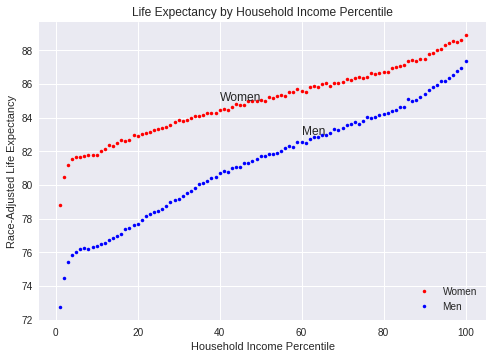

In [35]:
# Life expectancy vs. Household Income Percentile By Gender at Age 40
plot1 = plt.plot(tb1_F.pctile, tb1_F.le_raceadj, 'r.', label='Women')
plot2 = plt.plot(tb1_M.pctile, tb1_M.le_raceadj, 'b.', label='Men')
plt.xlabel('Household Income Percentile')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.title('Life Expectancy by Household Income Percentile')
plt.text(40, 85, 'Women')
plt.text(60, 83, 'Men')
plt.legend(loc='lower right')
plt.show()

In [28]:
# Life expectancy gap of bottom and top 1% 
le_F_b = tb1_F[tb1_F.pctile==1].le_raceadj.iloc[0]
print('Women, Bottom 1%:', round(le_F_b,1))
le_F_t = tb1_F[tb1_F.pctile==100].le_raceadj.iloc[0]
print('Women, Top 1%:', round(le_F_t,1))
diff_F = le_F_t - le_F_b
print('Women, Life expectancy gap:', round(diff_F,1))
le_M_b = tb1_M[tb1_M.pctile==1].le_raceadj.iloc[0]
print('Men, Bottom 1%:', round(le_M_b,1))
le_M_t = tb1_M[tb1_M.pctile==100].le_raceadj.iloc[0]
print('Men, Top 1%:', round(le_M_t,1))
diff_M = le_M_t - le_M_b
print('Men, Life expectancy gap:', round(diff_M,1))

Women, Bottom 1%: 78.8
Women, Top 1%: 88.9
Women, Life expectancy gap: 10.1
Men, Bottom 1%: 72.7
Men, Top 1%: 87.3
Men, Life expectancy gap: 14.6


In [30]:
# Gender gap in Life expectancy
gap_b = le_F_b - le_M_b
print('Gender gap, Bottom 1%:', round(gap_b,1))
gap_t = le_F_t - le_M_t
print('Gender gap, Top 1%:', round(gap_t,1))

Gender gap, Bottom 1%: 6.0
Gender gap, Top 1%: 1.5


In [31]:
# Slope of linear regression
# linear regression of females
slope_F, intercept, r_value, p_value, std_err = st.linregress(tb1_F.pctile, tb1_F.le_raceadj)
print('Women, Slope of linear regression:', round(slope_F,2))
# linear regression of males
slope_M, intercept, r_value, p_value, std_err = st.linregress(tb1_M.pctile, tb1_M.le_raceadj)
print('Men, Slope of linear regression:', round(slope_M,2))

Women, Slope of linear regression: 0.07
Men, Slope of linear regression: 0.11


#### 2. Trends in Life expectancy, 2001~2014

In [72]:
tb2 = pd.read_csv('table_2.csv', index_col=None)

In [73]:
tb2_m = tb2[tb2.gnd == 'M']
tb2_f = tb2[tb2.gnd == 'F']

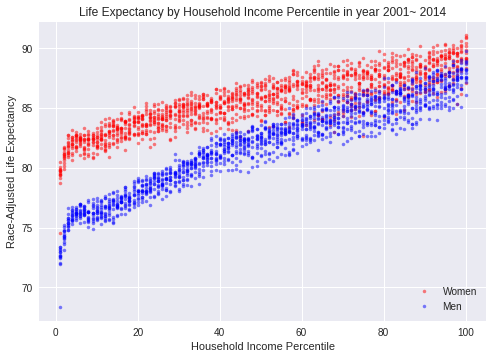

In [82]:
# Life expectancy vs. Household Income Percentile in year 2001~2014 By Gender at Age 40
#tb2_f.plot(kind='scatter', x='pctile', y='le_raceadj', marker='.')
plot1 = plt.plot(tb2_f.pctile, tb2_f.le_raceadj, 'r.', label='Women', alpha=0.5)
plot2 = plt.plot(tb2_m.pctile, tb2_m.le_raceadj, 'b.', label='Men', alpha=0.5)
plt.xlabel('Household Income Percentile')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.title('Life Expectancy by Household Income Percentile in year 2001~ 2014')
plt.legend(loc='lower right')
plt.show()

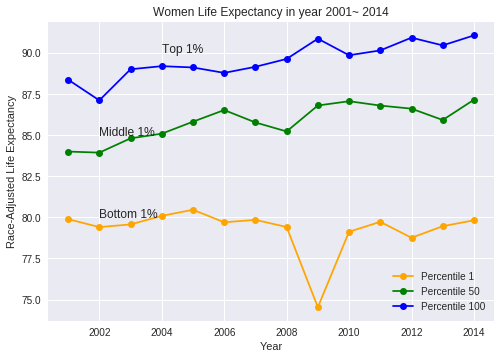

In [94]:
# Life expectancy of females in year 2001~2014 
tb2_f_1 = tb2_f[tb2_f.pctile==1]
tb2_f_50 = tb2_f[tb2_f.pctile==50]
tb2_f_100 = tb2_f[tb2_f.pctile==100]
plot1 = plt.plot(tb2_f_1.year, tb2_f_1.le_raceadj, color='orange', marker='o', label='Percentile 1')
plot2 = plt.plot(tb2_f_50.year, tb2_f_50.le_raceadj, color='green', marker='o', label='Percentile 50')
plot3 = plt.plot(tb2_f_100.year, tb2_f_100.le_raceadj, color='blue', marker='o', label='Percentile 100')
plt.xlabel('Year')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.title('Women Life Expectancy in year 2001~ 2014')
plt.annotate('Bottom 1%', xy=(2002,80))
plt.annotate('Middle 1%', xy=(2002,85))
plt.annotate('Top 1%', xy=(2004,90))
#plt.text(2003, 81, 'Bottom 1%')
#plt.text(2002, 85, 'Middle 1%')
#plt.text(2004, 89, 'Top 1%')
plt.legend(loc='lower right')
plt.show()

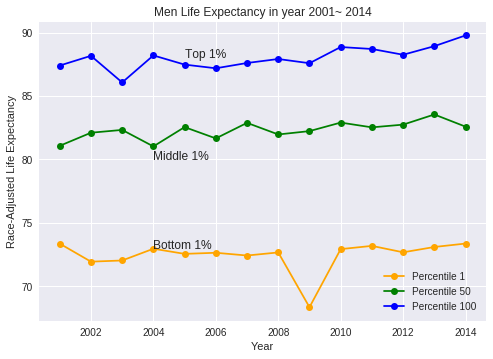

In [95]:
# Life expectancy of males in year 2001~2014 
tb2_m_1 = tb2_m[tb2_m.pctile==1]
tb2_m_50 = tb2_m[tb2_m.pctile==50]
tb2_m_100 = tb2_m[tb2_m.pctile==100]
plot1 = plt.plot(tb2_m_1.year, tb2_m_1.le_raceadj, color='orange', marker='o', label='Percentile 1')
plot2 = plt.plot(tb2_m_50.year, tb2_m_50.le_raceadj, color='green', marker='o', label='Percentile 50')
plot3 = plt.plot(tb2_m_100.year, tb2_m_100.le_raceadj, color='blue', marker='o', label='Percentile 100')
plt.xlabel('Year')
plt.ylabel('Race-Adjusted Life Expectancy')
plt.title('Men Life Expectancy in year 2001~ 2014')
plt.annotate('Bottom 1%', xy=(2004,73))
plt.annotate('Middle 1%', xy=(2004,80))
plt.annotate('Top 1%', xy=(2005,88))
#plt.text(2004, 73, 'Bottom 1%')
#plt.text(2004, 80, 'Middle 1%')
#plt.text(2005, 88, 'Top 1%')
plt.legend(loc='lower right')
plt.show()

In [91]:
# How are gaps in life expectancy changing over time?
gtb2_f = tb2_f.groupby('year')
le_gap_f = gtb2_f.le_raceadj.max() - gtb2_f.le_raceadj.min()
gtb2_m = tb2_m.groupby('year')
le_gap_m = gtb2_m.le_raceadj.max() - gtb2_m.le_raceadj.min()

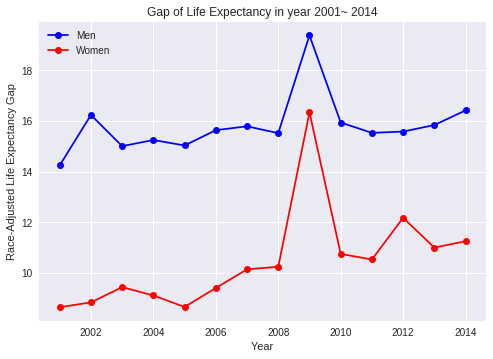

In [96]:
# Gap of Life expectancy vs. year By Gender in 2001~ 2014
plot1 = plt.plot(le_gap_m, color='blue', marker='o', label='Men')
plot2 = plt.plot(le_gap_f, color='red', marker='o', label='Women')
plt.xlabel('Year')
plt.ylabel('Race-Adjusted Life Expectancy Gap')
plt.title('Gap of Life Expectancy in year 2001~ 2014')
# plt.text(40, 85, 'Women')
# plt.text(60, 83, 'Men')
plt.legend(loc='upper left')
plt.show()